# Student name: Akshata Bheemasamudra Mallikarjunappa

# Student ID: 23164204

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import math
import random
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import pandas as pd
from sklearn.neural_network import MLPClassifier

# Task 1
### Purpose: 
To check your understanding of key terms used throughout this module.

## Answer

We have circumference and weight in the input space (which is the set of all possible inputs/features) for N samples. As the problem mentions, this is a linear classification problem, and the unknown target function, which is the formula an algorithm feeds data to, in order to calculate predictions, this formula needs to approximate and classify the data into two classes (class 1 and class2) which forms the output space for N samples. The input space and the output space together forms the entire data set having N samples/data points. The hypotheses set consists of a set of candidate formulas that an algorithm chooses to get the best linear fit to the data. Final hypothesis is the actual formula that a model learns and works better than other set of formulas. 

A perceptron is a model that adds weights to the features in input space, has bias and makes use of this to classify data by deriving at a final hypothesis from a hypotheses set which consists of possible formulas with different weights. A weight attached to each feature in an input space tells the importance of that feature. Bias is a parameter used to infer the deviation of the model from true values. The perceptron here, consists of three weights = w0 + w1x1 + w2x2 which forms the hypotheses set when used with multiple values and variations and this will help classify the output. The perceptron model is given by the formula h(x) = sign(WT X) where W is the weights vector and X is the input feature vector and let’s say in this case, a positive sign could classify the data into class 1 and a negative sign into class 2. 

The perceptron learning algorithm determines the value of the weight that best suits to the data point. And it is done by iterative method of updating the weights. If for a given instance of weight, the data is misclassified, then it goes back and updates the weight until there is no misclassified data point in the dataset which will give us the final hypothesis g. 
The error measure is the number of misclassified data points from the entire set of N samples. The in-sample error is the error(misclassification) that the perceptron makes using the training set of data which maybe very less and 0 when the dataset is exactly linearly separable. However, the out of sample error occurs when the perceptron is deployed on new data set and tells us how well it has generalized to unseen data, and this cannot be guaranteed to have a small error. But the Hoeffding inequality states that this error can be minimized with increase in the sample size N.


# Task 2
Learning curves allow us to look at the impact that the size of the training data set N has on the ability to keep the difference between $E_{in}$ and $E_{out}$ small.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    #plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_errors = 1- train_scores
    test_errors = 1-test_scores
    
    train_errors_mean = np.mean(train_errors, axis=1)
    train_errors_std = np.std(train_errors, axis=1)
    test_errors_mean = np.mean(test_errors, axis=1)
    test_errors_std = np.std(test_errors, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_errors_mean - test_errors_std,
                     test_errors_mean + test_errors_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_errors_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_errors_mean, 'o-', color="g",
             label="Test error")

    
    plt.legend(loc="best")
    return plt

In [4]:
data = np.loadtxt("Et1_Task2.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

## Logistic regression learning curve

In [5]:
cv = ShuffleSplit(n_splits=25, test_size=0.2)

<module 'matplotlib.pyplot' from 'C:\\Users\\91776\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

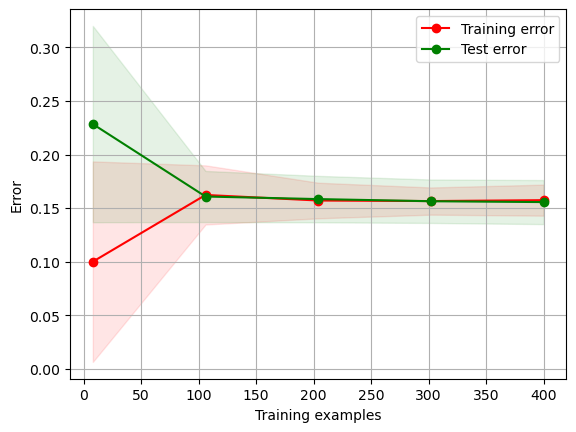

In [6]:
estimator = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5))

## Neural net learning curves

<module 'matplotlib.pyplot' from 'C:\\Users\\91776\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

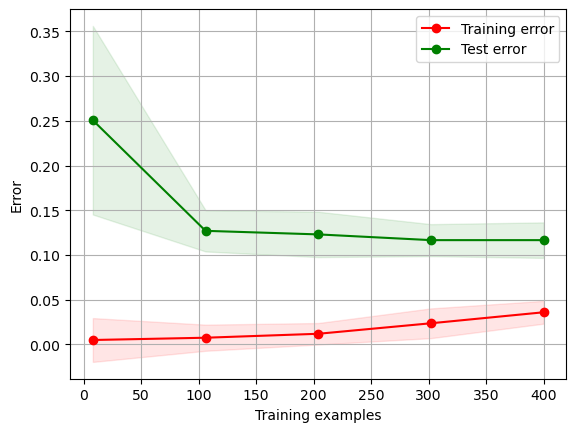

In [7]:
estimator = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(200, 4), random_state=1)
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5))

## Describe and Explain
Describe the results of the two learning curves and explain the differences in terms of what you currently understand about the relationship between $E_{in}$ and $E_{out}$ and the number of training samples, N. Provide clear explanations:

- Why the training error is (generally) lower than the test error
- Why the training error increases as the number of training samples is increased
- Which of the two models is the more complex model

### Answer


The neural network learning curve has performed better for Eout as the sample size N increases however the Ein error increased slightly. The logistic regression has a considerable bad error rate irrespective of the type of data (be it Ein or Eout), althought the Eout decreases with increase in N, it does not hold good for Ein. 

##### Why the training error is (generally) lower than the test error.
__ The training error Ein is lower because the model uses multiple hypotheses and tries to find the best hypothesis to fit the data closely to the actual output. As seen in Task1, the perceptron iteratively updates the weights until the missclassification is reduced and is accustomed to the pattern the in-sample data has.  Whereas the test error is usually larger because now the model is performing on unseen data and there is no gurantee that the previously learned hypothesis or formula works well for the new data.

##### Why it is possible for the training error to be higher than the test error.
__ In general the training error can be huge when the model is unable to find the pattern or map to the output data point in the training dataset due to various reasons like less number of samples ( small sample size N), there is noise in the data. As per Hoeffding inequality bound, this happens when the epsolon value is large/positive. 

##### Why the training error increases as the number of training samples is increased.
__ The training data fits well when there is a small sample size N, but as the data points increase, it will become impossible to derive a model that classifies or draws a pattern that is perfectly fine. Perceptron shatters the data sets at some break point k. 

##### Which of the two models is the more complex model
__ The neural networking learning curve is more complex. It takes a good number of samples to get Eout coser to Ein although the difference or the generalization error still exists but it performs better tha the first model. 



# Task 3

## Provided functions

Below functions implement linear regression in a closed form (one-step solution using the pseudo-inverse).

In [8]:
def linreg_weights(X,y):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [9]:
def linreg_predict(w,X):
    ''' Returns a prediction y for data point X for a linear regression described by weights w '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    
    # Calculation of outputs given weights and data (X). 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

# Task 3a

### Answer

In [26]:
def calc_error(w,X,y):
    predict = linreg_predict(w,X)
    error = y - predict
    return np.mean((error)** 2)

In [27]:
data = np.loadtxt("Et1_Task3a.csv", delimiter=",")
X = data[:,0:1]
y=data[:,1]

In [36]:
w = linreg_weights(X, y)
regression_line = X * w[1] + w[0]
predict = linreg_predict(w, X)
result = y - predict
mse = np.argmax(np.abs(result))
print("Outlier Point => X = ", X[mse], " y =", y[mse])
print("Weights, -y = wx+b")
print("“w” is the weight/slope and “b” is the bias/intercept.")
print("-0.51050541x + 0.37569601")

Outlier Point => X =  [0.73684211]  y = 0.8657746706245105
Weights, -y = wx+b
“w” is the weight/slope and “b” is the bias/intercept.
-0.51050541x + 0.37569601


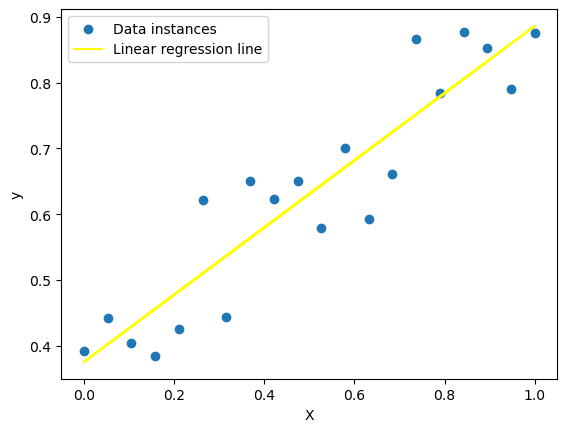

In [31]:
plt.scatter(X,y, label='Data instances')
plt.plot(X, regression_line, label='Linear regression line', color='yellow')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

error =>  0.004281801813255597


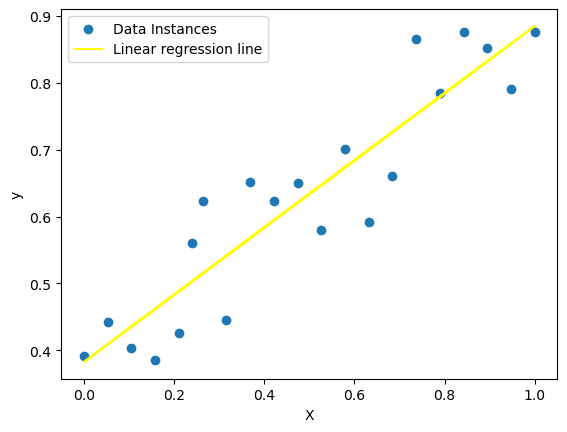

error =>  0.0042451717568716095


In [35]:
print("error => ", calc_error(w,X,y))

X_new = np.append(X, [[0.24]], axis = 0)
y_new = np.append(y, [0.56])
w_new = linreg_weights(X_new, y_new)
linear = X_new * w_new[1] + w_new[0]

plt.scatter(X_new,y_new, label='Data Instances')
plt.plot(X_new, linear, label='Linear regression line', color='yellow')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

print("error => ", calc_error(w_new,X_new,y_new))

You may add as many cells below as you require.

##  Describe and Explain
Discuss your results and answer the following questions:
1. Which data point adds the biggest error term to the optimised error function?
2. How does the error contributed by this point relate to its distance from the regression line/function? 
3. How do outliers effect linear regression and why?
4. Under what circumstances will linear regression with a squared error measure be a good model?

1. 0.78
2. The error contributed is not making much of a distance however if the error was too high, it would make the regression line slope in such a way that the vertical distance between the data point and the slope would be higher.
3. Outliers cause misclassification of the data, where the bias and the weights can be the root cause of this. 
4. If the output data (dependent variable) is strongly related to the input data (independent variable). 

# Task 3b

For regression the Mean Squared Error measure is a useful error measure. In this task we will explore how useful mean squared error is for classification. To this end:

- Use the provided code to classify the provided data using the linear classification algorithm
- Note that linear classification is implemented by putting the output of the linear regression model through the sign function

### Answer

In [ ]:
def calc_class_error(w,X,y):
    # implement your error function for linear classification here

In [30]:
def linclass_predict(w,X):
    # implement your linear classification algorithm here

You may add as many cells below as you require.

##  Describe and Explain
Describe the impact of the outlier on both models. Explain why logistic regression is less sensitive to the outlier. 

Provide your answer in this cell..

 # Reflection
 Once you have completed all tasks in this notebook and have studied all other materials for this E-tivity (resources, lectures and live sessions), answer the following questions.
<ol>
<li>Summarise your understanding of how the Hoeffding bound, the concept of 'shattering', break points and the growth function inform the VC bound for a binary classifier. Also discuss how this relates to the general rule of thumb in machine learning that one needs a number of data points at least equal to 10 times the VC bound.</li>
<li>Summarise your understanding of the approximation-generalisation trade-off in terms of complexity, bias and variance of a model, and the resulting under/overfitting given the available data. </li>
    </ol>

## 1
Hoeffding bound helps to draw the boundary between the in sample and out of sample error and draw the error distance from the true value. Shattering indicates the breakpoint of a model where no more dichotomies can be derived. 

## 2
The higher the bias, model is likely to underfit and higher the variance the model is likely to overfit. This happens when training data performs well but test data doesn't classify properly. 

<hr style="border:2px solid gray">

# Appendix

## Demonstration of effect of outlier on logistic regression decision boundary for comparision with linear classification

Below code demonstrates the effect of an outlier on the decision boundary chosen by logistic regression. You can use this code to compare the effect of outliers in a classification algorithm using mean square error as the error measure with that in a classification algorithm using log likelihood as the error measure. Moreover, below code provides some good hints for plotting the decision boundary in task 3b :-).

Load data:

In [ ]:
data = np.loadtxt("Et1_Task3b.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

Fit model:

In [ ]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X,y)
estimator.score(X,y)

Extract weights from model:

In [ ]:
w_lr = estimator.intercept_
w_lr=np.append(w_lr, estimator.coef_)
w_lr

Add outlier:

In [ ]:
X = np.append(X,[[-2,6]], axis=0)
y = np.append(y,[1],axis=0)

Fit model with outlier:

In [ ]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X,y)
estimator.score(X,y)

Extract new weight vector from model:

In [ ]:
w_lr_2 = estimator.intercept_
w_lr_2=np.append(w_lr_2, estimator.coef_)
w_lr_2

Plot original and new decision boundary using weight vectors. Decision boundary is defined by equation: $w_0+x_0\cdot w_1+x_1 \cdot w_2=0 \rightarrow x_2 = -\frac{w_0}{w_2}-x_1\frac{w_1}{w_2}$

In [ ]:
y_p = estimator.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot([-2,2],[-w_lr[0]/w_lr[2]+w_lr[1]/w_lr[2]*2,-w_lr[0]/w_lr[2]-w_lr[1]/w_lr[2]*2],'b',label="original data")
plt.plot([-2,2],[-w_lr_2[0]/w_lr_2[2]+w_lr_2[1]/w_lr_2[2]*2,-w_lr_2[0]/w_lr_2[2]-w_lr_2[1]/w_lr_2[2]*2],'r',label='data with outlier')

plt.title("Data with outlier classified with logistic regression")
plt.legend(loc="upper right")
plt.show()
1-sum(abs(y_p-y))/len(y)